# Data Mining from Flipkart 

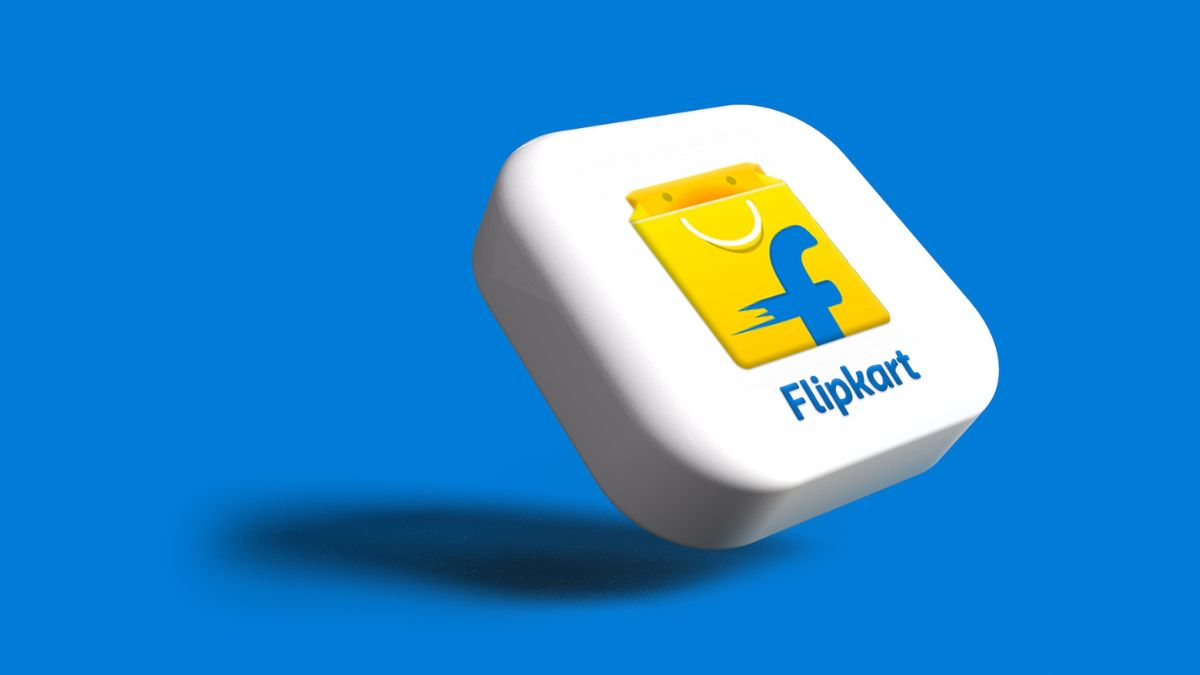

In [1]:
from IPython import display
display.Image("C:\\Users\\Rohan\\Desktop\\fc2.jpg")

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
url='https://www.flipkart.com'
search_button='/search?q='
search=input('Your search : ')
f_url=url+search_button+search

Your search : phone


## Mobile name 

In [4]:
n_page=int(input('Number of pages : '))
name=[]
next_page=f_url+'&page='
for i in range(1,n_page+1):
    com_url=next_page+str(i)
    req=requests.get(com_url)
    soup=BeautifulSoup(req.text,'html.parser')
    eli=soup.find_all('div',class_='_4rR01T')
    for e in eli:
        name.append(e.text)
name_df=pd.DataFrame({'name':name})
name_df

Number of pages : 5


,name
0,"APPLE iPhone 14 (Blue, 128 GB)"
1,"APPLE iPhone 14 (Starlight, 128 GB)"
2,"APPLE iPhone 14 (Midnight, 128 GB)"
3,"APPLE iPhone 14 (Purple, 128 GB)"
4,"APPLE iPhone 14 Plus (Blue, 128 GB)"
...,...
115,"realme 11 Pro 5G (Oasis Green, 256 GB)"
116,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)"
117,POCO C51 - Locked with Airtel Prepaid (Power B...
118,"vivo T2x 5G (Marine Blue, 128 GB)"


## Price of the phones 

In [5]:
price=[]
for p in range(1,n_page+1):
    price_url=next_page+str(p)
    req1=requests.get(price_url)
    soup1=BeautifulSoup(req1.text,'html.parser')
    pri=soup1.find_all('div',class_='_30jeq3 _1_WHN1')
    for pr in pri:
        price.append(pr.text)
name_df['price']=price
name_df

,name,price
0,"APPLE iPhone 14 (Blue, 128 GB)","₹57,999"
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹57,999"
2,"APPLE iPhone 14 (Midnight, 128 GB)","₹57,999"
3,"APPLE iPhone 14 (Purple, 128 GB)","₹58,999"
4,"APPLE iPhone 14 Plus (Blue, 128 GB)","₹65,999"
...,...,...
115,"realme 11 Pro 5G (Oasis Green, 256 GB)","₹10,199"
116,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹6,599"
117,POCO C51 - Locked with Airtel Prepaid (Power B...,"₹6,599"
118,"vivo T2x 5G (Marine Blue, 128 GB)","₹13,999"


## Features

In [6]:
sp=[]
for s in range(1,n_page+1):
    sp_url=next_page+str(s)
    req2=requests.get(sp_url)
    soup2=BeautifulSoup(req2.text,'html.parser')
    spf=soup2.find_all('ul',class_='_1xgFaf')
    for sf in spf:
        sp.append(sf.text)
name_df['features']=sp
name_df

,name,price,features
0,"APPLE iPhone 14 (Blue, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"APPLE iPhone 14 (Midnight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"APPLE iPhone 14 (Purple, 128 GB)","₹58,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
4,"APPLE iPhone 14 Plus (Blue, 128 GB)","₹65,999",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
...,...,...,...
115,"realme 11 Pro 5G (Oasis Green, 256 GB)","₹10,199",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...
116,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
117,POCO C51 - Locked with Airtel Prepaid (Power B...,"₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...
118,"vivo T2x 5G (Marine Blue, 128 GB)","₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...


## Ratings

In [7]:
ratings=[]
ru=[]
n_u=[]
for r in range(1,n_page+1):
    rat_url=next_page+str(r)
    req3=requests.get(rat_url)
    soup3=BeautifulSoup(req3.text,'html.parser')
    rate=soup3.find_all('div',class_='gUuXy-')
    for ra in rate:
        ratings.append(ra.text)
for r in ratings:
    ru.append(r[0:3])
for u in ru:
    if u[1] != '.' :
        n_u.append(ru.index(u))
        ind=ru.index(u)
        ru.pop(ind)    
name_df.drop(index=n_u,axis=0,inplace=True)
name_df['ratings']=ru
name_df.index=range(0,len(name_df))
name_df

,name,price,features,ratings
0,"APPLE iPhone 14 (Blue, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7
2,"APPLE iPhone 14 (Midnight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7
3,"APPLE iPhone 14 (Purple, 128 GB)","₹58,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7
4,"APPLE iPhone 14 Plus (Blue, 128 GB)","₹65,999",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6
...,...,...,...,...
112,"realme 11 Pro 5G (Oasis Green, 256 GB)","₹10,199",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.3
113,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.3
114,POCO C51 - Locked with Airtel Prepaid (Power B...,"₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.1
115,"vivo T2x 5G (Marine Blue, 128 GB)","₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.5


## Review count

In [8]:
!pip install optimal-data-selector

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from optimal_data_selector.text import word_tokenizer

In [10]:
ch=[]
for i in range(1,100000):
    ch.append(str(i))
count=[]
re_count=[]
n_rateings=[]
for co in range(1,n_page+1):
    co_url=next_page+str(co)
    requ=requests.get(co_url)
    b_soup=BeautifulSoup(requ.text,'html.parser')
    sb5=b_soup.find_all('div',class_='gUuXy-')
    for con in sb5:
        count.append(con.text)
for c1 in count:
    tok=word_tokenizer(c1,del_words=',')
    if tok[-3] in ch:
        re_count.append(tok[-3]+tok[-2])
    else:
        re_count.append(tok[-2])
    #re_count.append(tok[-3:-1])
for e in n_u:
    re_count.pop(e)
name_df['total_review_for each model']=re_count
name_df

,name,price,features,ratings,total_review_for each model
0,"APPLE iPhone 14 (Blue, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,4356
1,"APPLE iPhone 14 (Starlight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,4356
2,"APPLE iPhone 14 (Midnight, 128 GB)","₹57,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,4356
3,"APPLE iPhone 14 (Purple, 128 GB)","₹58,999",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,4.7,4356
4,"APPLE iPhone 14 Plus (Blue, 128 GB)","₹65,999",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,4.6,1545
...,...,...,...,...,...
112,"realme 11 Pro 5G (Oasis Green, 256 GB)","₹10,199",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.3,4307
113,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.3,4307
114,POCO C51 - Locked with Airtel Prepaid (Power B...,"₹6,599",4 GB RAM | 128 GB ROM | Expandable Upto 512 GB...,4.1,1985
115,"vivo T2x 5G (Marine Blue, 128 GB)","₹13,999",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,4.5,705


##  Reviews

In [11]:
f_rav=[]
for re in range(1,n_page+1):
    rev=next_page+str(re)
    req4=requests.get(rev)
    soup4=BeautifulSoup(req4.text,'html.parser')
    ab=soup4.find_all('a',class_='_1fQZEK')
    for i in range(0,len(ab)):
        reev=url+ab[i].get('href')
        reqq=requests.get(reev)
        sou=BeautifulSoup(reqq.text,'html.parser')
        rr=sou.find('a',class_='col-3-12 hXkZu- _1pxF-h').get('href')

        uurl=url+rr
        req7=requests.get(uurl)
        soup7=BeautifulSoup(req7.text,'html.parser')
        detail_rav=soup7.find_all('div',class_='t-ZTKy')
        for d in detail_rav:
            f_rav.append(d.text)
rev_df=pd.DataFrame({'review':f_rav})      
rev_df

,review
0,...I simply love it🥰🥰🥰🥰🥰Camera quality 🥰🔋😍😍Ver...
1,...Excellent Feacture And Camera And MobileREA...
2,"...The camera is top notch , the quality pictu..."
3,...Powerful hardware with the A16 chip. Improv...
4,...Camera quality awesome Amazing performanceR...
...,...
1184,...Camera quality is awesome.And build is best...
1185,...Camera is good as compared to redmi note 11...
1186,...earlier Redmi Note 7 Pro. The new OS is oka...
1187,...quality - fast charging (67 w) Cons - camer...


In [12]:
from optimal_data_selector.text import EmoTextHandeler,Punctuations

## Removing Punctuations

In [13]:
def remove_fullstop(text):
    w_tok=word_tokenizer(text)
    sent=' '.join([word for word in w_tok if word not in Punctuations])
    return sent
rev_df['review']=rev_df['review'].apply(lambda text:remove_fullstop(text))   
rev_df
    

,review
0,I simply love it🥰🥰🥰🥰🥰Camera quality 🥰🔋😍😍VerREA...
1,Excellent Feacture And Camera And MobileREAD MORE
2,The camera is top notch the quality pictures i...
3,Powerful hardware with the A16 chip Improved c...
4,Camera quality awesome Amazing performanceREAD...
...,...
1184,Camera quality is awesome And build is best qu...
1185,Camera is good as compared to redmi note 11 pr...
1186,earlier Redmi Note 7 Pro The new OS is okay Th...
1187,quality fast charging 67 w Cons camera front c...


## Removing Emojis and Emoticons

In [14]:
rev_df['review']=rev_df['review'].apply(lambda text:EmoTextHandeler(text,remove_from_list=['🥰']))
rev_df

,review
0,I simply love it Camera quality VerREAD MORE
1,Excellent Feacture And Camera And MobileREAD MORE
2,The camera is top notch the quality pictures i...
3,Powerful hardware with the A16 chip Improved c...
4,Camera quality awesome Amazing performanceREAD...
...,...
1184,Camera quality is awesome And build is best qu...
1185,Camera is good as compared to redmi note 11 pr...
1186,earlier Redmi Note 7 Pro The new OS is okay Th...
1187,quality fast charging 67 w Cons camera front c...
